<a href="https://colab.research.google.com/github/Jyoti1706/tensorflow-certification/blob/main/Medical_Insurance_Cost_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
insurance.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
insurance_one_hot = pd.get_dummies(insurance)

In [10]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
insurance_one_hot.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [15]:

y= insurance_one_hot['charges']
X = insurance_one_hot.drop(['charges'], axis = 1)

In [16]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [23]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=17)
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
588,61,35.91,0,1,0,1,0,1,0,0,0
421,61,35.86,0,0,1,0,1,0,0,1,0
90,21,39.49,0,1,0,1,0,0,0,1,0
1147,20,31.92,0,1,0,1,0,0,1,0,0
934,32,37.18,2,0,1,1,0,0,0,1,0


In [24]:

x_train.shape,x_test.shape

((1070, 11), (268, 11))

In [26]:
tf.random.set_seed(42)
# 1. Create model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
insurance_model.fit(x_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8939.9893 - mae: 8939.9893
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7958.3530 - mae: 7958.3530
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7947.1821 - mae: 7947.1821
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7963.5264 - mae: 7963.5264
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7783.6631 - mae: 7783.6631
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8002.8335 - mae: 8002.8335
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7979.6924 - mae: 7979.6924
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7877.5605 - mae: 7877.5605
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7889.3628 - mae: 7889.3628
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7803.8706 - mae: 7803.8706

In [27]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8804.1338 - mae: 8804.1338


[8804.1337890625, 8804.1337890625]

In [41]:
# 1. Create model
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
insurance_model_1.fit(x_train,y_train, epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13554.9678 - mae: 13554.9678
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13409.3096 - mae: 13409.3096
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13082.2471 - mae: 13082.2471
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12426.8115 - mae: 12426.8115
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11323.3975 - mae: 11323.3975
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9897.5625 - mae: 9897.5625
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8562.8701 - mae: 8562.8701
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7876.1851 - mae: 7876.1851
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7743.2568 - mae: 7743.2568
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7717.3994 - mae:

In [42]:
insurance_model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3916.0271 - mae: 3916.0271


[3916.027099609375, 3916.027099609375]

In [46]:
# 1. Create model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
history = insurance_model_2.fit(x_train,y_train, epochs=200,verbose=1)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13553.9277 - mae: 13553.9277
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13388.7539 - mae: 13388.7539
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13052.6182 - mae: 13052.6182
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12390.2109 - mae: 12390.2109
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11277.3066 - mae: 11277.3066
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 9842.7061 - mae: 9842.7061
Epoch 7/200
34/34 [==============================] - 0s 9ms/step - loss: 8523.5078 - mae: 8523.5078
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 7868.8486 - mae: 7868.8486
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7745.6875 - mae: 7745.6875
Epoch 10/200
34/34 [==============================] - 0s 8ms/step - loss: 7720.2100 - mae:

In [44]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3291.4038 - mae: 3291.4038


[3291.40380859375, 3291.40380859375]

In [45]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8804.1338 - mae: 8804.1338


[8804.1337890625, 8804.1337890625]

Text(0.5, 0, 'epochs')

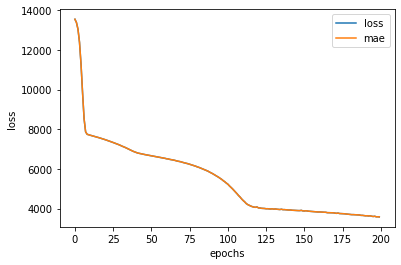

In [47]:
#Plot History: Training Curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [48]:
# 1. Create model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
history_3 = insurance_model_3.fit(x_train,y_train, epochs=500,verbose=0)

Text(0.5, 0, 'epochs')

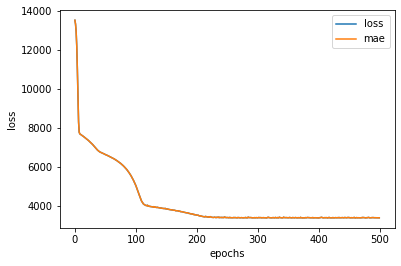

In [49]:
#Plot History: Training Curve
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

🤔 **Question: How long should you train for?**

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.